In [14]:
import numpy as np



def split_matrix(matrix, N):
    # Get the size of the matrix (m x m)
    m = matrix.shape[0]
    part_size = m // N  # The size of each part

    # Create a list to hold the N parts
    parts = []

    # Split the matrix into N x N submatrices
    for i in range(N):
        for j in range(N):
            # Get the submatrix for part (i, j)
            submatrix = matrix[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size]
            parts.append(submatrix)

    return parts

def save_parts(parts):
    # Save each part to a separate file
    for idx, part in enumerate(parts):
        file_name = f'part_{idx + 1}.asc'
        np.savetxt(file_name, part, fmt='%d')

def read_matrix_from_file(file_path):
    # Read the matrix from the .asc file (assuming space-separated values)
    matrix = np.loadtxt(file_path, dtype=int)
    return matrix

In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage

path = 'C:/Users/g.sergey/python/mfm_nft_data'
os.chdir(path)
mypath = os.getcwd()
print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

#file_path = "SC_041-Phase_140nm_thick_lift_30nm_2500G_1_61K-bwd.asc"
#data = np.loadtxt(file_path)



C:\Users\g.sergey\python\mfm_nft_data


In [68]:
input_file = 'SC_041-Phase_140nm_thick_lift_30nm_2500G_1_61K-bwd.asc'  # Path to the input .asc file
N = 4  # Number of parts to split the matrix into

    # Read the matrix from the file
matrix = data

    # Check if the matrix size is divisible by N
if matrix.shape[0] % N != 0:
    print(f"Error: The matrix size {matrix.shape[0]} is not divisible by {N}.")

def split_matrix(matrix, N):
    # Get the size of the matrix (m x m)
    m = matrix.shape[0]
    part_size = m // N  # The size of each part

    # Create a list to hold the N parts
    parts = []
    i = 0
    j = 0
    # Split the matrix into N x N submatrices
    for i in range(N):
        for j in range(N):
            # Get the submatrix for part (i, j)
            submatrix = matrix[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size]
            parts.append(submatrix)
    return parts
    
    # Split the matrix into N parts
parts = split_matrix(matrix, N)
print(parts[0].shape[0])
    # Save the parts to separate files
save_parts(parts)

#print(f"The matrix has been split into {N} parts and saved to individual files.")
#print(matrix[1:3,1:5], matrix.shape[0])
lower_bound = np.percentile(data, 0.1)  # 2.5th percentile
upper_bound = np.percentile(data, 99.9)
print(upper_bound-lower_bound)

128
1.5392316122280416


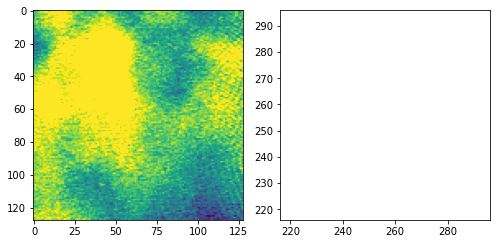

In [51]:
part1 = np.loadtxt('part_1.asc')
part2 = np.loadtxt('part_2.asc')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax1.imshow(parts[15], vmin = -0.4, vmax=0.4, cmap='viridis')
ax2.imshow(parts[3], vmin = -0.4, vmax=0.4, cmap='viridis')
plt.xlim(216, 296)
plt.ylim(216, 296)
fig.tight_layout()
plt.show()

In [2]:
def split_matrix(matrix, N):
    # Get the size of the matrix (m x m)
    m = matrix.shape[0]
    part_size = m // N  # The size of each part

    # Create a list to hold the N parts
    parts = []
    i = 0
    j = 0
    # Split the matrix into N x N submatrices
    for i in range(N):
        for j in range(N):
            # Get the submatrix for part (i, j)
            submatrix = matrix[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size]
            parts.append(submatrix)
    return parts

def range_no_tails(data):
    """Calculate the 95% range difference (excluding outliers)."""
    lower_bound = np.percentile(data, 0.1)  
    upper_bound = np.percentile(data, 99.9)  
    return upper_bound - lower_bound  # Return range difference



def process_matrix_file(file_path, n_parts, output_file):
    """Read a matrix from a file, process, and write the 95% range differences."""
    
    # Load the matrix from the file (assuming space-separated values)
    matrix = np.loadtxt(file_path)
    
    # Split the matrix into parts
    parts = split_matrix(matrix, n_parts)
    #save_parts(parts)
    for i, part in enumerate(parts):
        part_filename = os.path.join(output_folder, f"part_{i+1}_{os.path.basename(file_path)}")
        #part_filename = f"part_{i+1}_{os.path.basename(file_path)}"
        np.savetxt(part_filename, part, fmt="%.6f")  # Save each part as a new file
    # Calculate the 95% range difference for each part
    ranges = [range_no_tails(np.array(part).flatten()) for part in parts]
    
    # Write results to the output file
    with open(output_file, 'a') as f:  # 'a' for append mode
        f.write(" ".join(map(str, ranges)) + "\n")  # Save as a row

output_folder = "C:/Users/g.sergey/python/mfm_nft_data/parts"
        
for file in files:
    process_matrix_file(file, 4, 'test.txt')
    

In [ ]:
import numpy as np
import os

def range_95_percent(data):
    """Calculate the 95% range difference (excluding outliers)."""
    lower_bound = np.percentile(data, 2.5)  # 2.5th percentile
    upper_bound = np.percentile(data, 97.5)  # 97.5th percentile
    return upper_bound - lower_bound  # Return range difference

def split_matrix(matrix, n_parts):
    """Split matrix into n_parts along rows."""
    split_size = len(matrix) // n_parts
    return [matrix[i * split_size : (i + 1) * split_size] for i in range(n_parts)]

def process_matrix_file(file_path, n_parts, output_file, output_folder):
    """Read a matrix, split it, save parts in a folder, and write 95% range differences."""
    
    # Load the matrix from the file (assuming space-separated values)
    matrix = np.loadtxt(file_path)
    
    # Split the matrix into parts
    parts = split_matrix(matrix, n_parts)

    # Ensure the output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Process each part
    ranges = []
    for i, part in enumerate(parts):
        part_filename = os.path.join(output_folder, f"part_{i+1}_{os.path.basename(file_path)}")
        np.savetxt(part_filename, part, fmt="%.6f")  # Save each part in the folder
        ranges.append(range_95_percent(part.flatten()))  # Compute range difference
    
    # Write the range differences to the output file
    with open(output_file, 'a') as f:  # 'a' for append mode
        f.write(" ".join(map(str, ranges)) + "\n")  # Save as a row

def process_multiple_files(file_list, n_parts, output_file, output_folder):
    """Process multiple files and store results in an output file."""
    
    # Ensure the output file is empty before writing
    if os.path.exists(output_file):
        os.remove(output_file)
    
    for file in file_list:
        process_matrix_file(file, n_parts, output_file, output_folder)
    
    print(f"Processing complete! Split parts saved in '{output_folder}', results in '{output_file}'.")

for file in files:
    process_multiple_files(file_list, 4, output_file, output_folder)

In [ ]:
k = 0
for file in files:
    data = np.loadtxt(file)
    N = 4
    split_matrix(data, N)
    parts[0+k]
    
    k = k+1

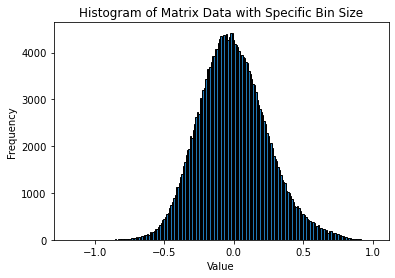

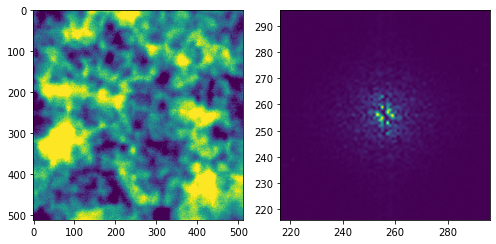

In [9]:
flattened_data = data.flatten()

# Specify the bin size
bin_size = 0.01

# Compute histogram
hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))

# Step 4: Plot Histogram
# Plot histogram
plt.bar(bins[:-1], hist, width=bin_size, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Data with Specific Bin Size')
plt.show()

# Compute the 2D FFT
fft_data = np.fft.fft2(data)
# Shift zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax1.imshow(data, vmin = -0.4, vmax=0.4, cmap='viridis')
ax2.imshow(np.abs(fft_shifted), interpolation = 'spline16', cmap='viridis')
plt.xlim(216, 296)
plt.ylim(216, 296)
fig.tight_layout()
plt.show()